In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Original data is separated by delimiter “ loan.csv “ in given data set.

In [90]:
df.shape

(517, 5)

I found out the total number of rows and columns in the data set using “.shape”.Dataset comprises of 517 observations and 5 characteristics.

# Data Information

In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Data has only object and integer values.

In [5]:
print(f"Data has {df.shape[0]} rows and{df.shape[1]} columns")

Data has 614 rows and13 columns


# Preprocess the data

In [6]:
df=pd.read_csv("loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df = df[list(df.columns[2:])]
df = df.drop(['Self_Employed', 'Loan_Status', 'Property_Area'], axis=1)
df = df.dropna()
print(df.shape)
df.head()

(517, 8)


,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,Yes,1,Graduate,4583,1508.0,128.0,360.0,1.0
2,Yes,0,Graduate,3000,0.0,66.0,360.0,1.0
3,Yes,0,Not Graduate,2583,2358.0,120.0,360.0,1.0
4,No,0,Graduate,6000,0.0,141.0,360.0,1.0
5,Yes,2,Graduate,5417,4196.0,267.0,360.0,1.0


In [8]:
numCol=[]
catCol=[]

for col in df.columns:
    if df[col].dtype=='O':
        catCol.append(col)
    else:
            numCol.append(col)

In [9]:
print("List of categorical columns:",catCol)
print("List of numerical columns:",numCol)

List of categorical columns: ['Married', 'Dependents', 'Education']
List of numerical columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


# Descriptive Statistics

In [10]:
df.describe(include='all')

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,517,517,517,517.000000,517.000000,517.000000,517.000000,517.000000
unique,2,4,2,NaN,NaN,NaN,NaN,NaN
top,Yes,0,Graduate,NaN,NaN,NaN,NaN,NaN
freq,333,295,413,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,5541.632495,1555.657485,146.145068,341.825919,0.856867
std,NaN,NaN,NaN,6472.488133,2546.176498,84.920461,64.611485,0.350548
min,NaN,NaN,NaN,150.000000,0.000000,9.000000,36.000000,0.000000
25%,NaN,NaN,NaN,2895.000000,0.000000,100.000000,360.000000,1.000000
50%,NaN,NaN,NaN,3833.000000,1126.000000,128.000000,360.000000,1.000000
75%,NaN,NaN,NaN,5821.000000,2250.000000,168.000000,360.000000,1.000000


This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [11]:
df[numCol].describe

<bound method NDFrame.describe of      ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
5               5417             4196.0       267.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  
1               1.0  
2               1.0  
3               1.0  
4

In [12]:
df[catCol].describe().T

,count,unique,top,freq
Married,517,2,Yes,333
Dependents,517,4,0,295
Education,517,2,Graduate,413


# Missing Value Analysis

In [13]:
df.isna().sum()

Married              0
Dependents           0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [14]:
df.isna().sum()/df.shape[0]*100

Married              0.0
Dependents           0.0
Education            0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
dtype: float64

In [15]:
df[df.isna().sum(axis=1)>1]

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History


No variable column has null/missing values

<AxesSubplot:>

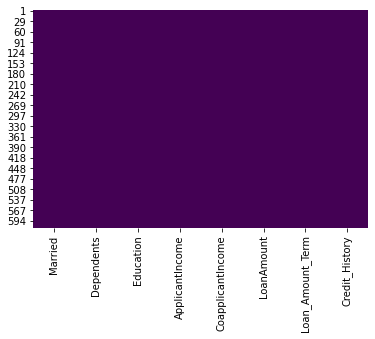

In [16]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

# Check Duplicate,Repeated & Unknown values

In [17]:
df[df.duplicated()]

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
469,Yes,0,Graduate,4333,2451.0,110.0,360.0,1.0


In [18]:
for i in catCol:
    print(i,"---%Null", (df[i].shape[0]-df[i].notnull().sum()) / df[i].shape[0]*100)
    print(df[i].value_counts())
    print("\n")

Married ---%Null 0.0
Yes    333
No     184
Name: Married, dtype: int64


Dependents ---%Null 0.0
0     295
2      92
1      85
3+     45
Name: Dependents, dtype: int64


Education ---%Null 0.0
Graduate        413
Not Graduate    104
Name: Education, dtype: int64




In [19]:
for i in numCol:
    print(i,"---%Null", (df[i].shape[0]-df[i].notnull().sum()) / df[i].shape[0]*100)
    print(df[i].value_counts())
    print("\n")

ApplicantIncome ---%Null 0.0
2500    8
4583    6
5000    5
3750    5
2600    5
       ..
8566    1
5488    1
3357    1
3430    1
4095    1
Name: ApplicantIncome, Length: 432, dtype: int64


CoapplicantIncome ---%Null 0.0
0.0       232
2500.0      5
2083.0      5
1666.0      5
5625.0      3
         ... 
1842.0      1
1875.0      1
3500.0      1
5064.0      1
1700.0      1
Name: CoapplicantIncome, Length: 243, dtype: int64


LoanAmount ---%Null 0.0
120.0    16
110.0    16
100.0    13
187.0    12
128.0    10
         ..
246.0     1
243.0     1
296.0     1
218.0     1
436.0     1
Name: LoanAmount, Length: 194, dtype: int64


Loan_Amount_Term ---%Null 0.0
360.0    443
180.0     40
480.0     12
300.0     10
84.0       3
120.0      3
240.0      2
36.0       2
60.0       2
Name: Loan_Amount_Term, dtype: int64


Credit_History ---%Null 0.0
1.0    443
0.0     74
Name: Credit_History, dtype: int64




# Univariate Analysis

In [20]:
for i in catCol:
    print(i)
    print(df[i].nunique())
    print(df[i].value_counts())
    print("\n")

Married
2
Yes    333
No     184
Name: Married, dtype: int64


Dependents
4
0     295
2      92
1      85
3+     45
Name: Dependents, dtype: int64


Education
2
Graduate        413
Not Graduate    104
Name: Education, dtype: int64




This tells us vote count of each quality score in descending order.“Dependents” has most values concentrated in the categories 0,2.

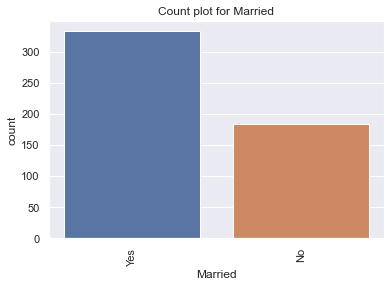

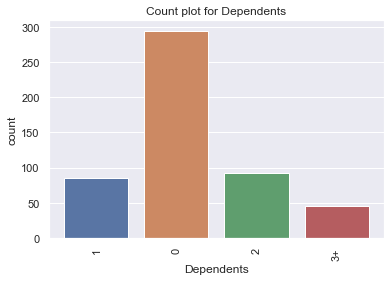

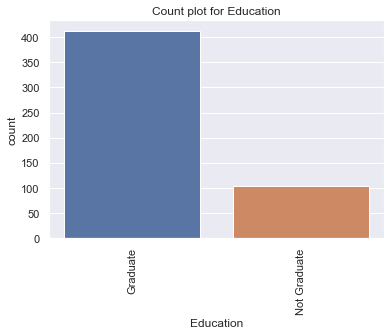

In [21]:
for i in catCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.title(f"Count plot for {i}")
    plt.plot()
    plt.show()

<Figure size 432x288 with 0 Axes>

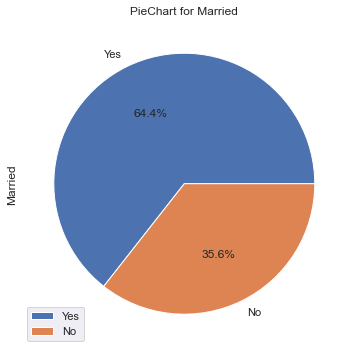

<Figure size 432x288 with 0 Axes>

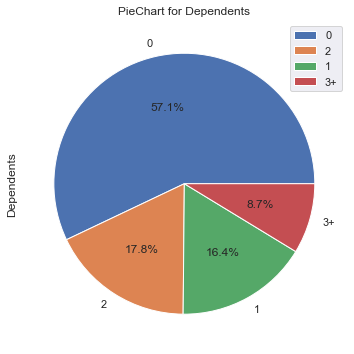

<Figure size 432x288 with 0 Axes>

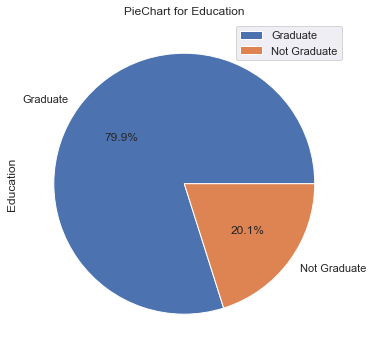

In [22]:
for i in catCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    countsDF= pd.DataFrame(df[i].value_counts())
    plot= countsDF.plot.pie(subplots=True,autopct="%.1f%%",figsize=(11,6))
    plt.title(f"PieChart for {i}")
    plt.plot()
    plt.show()

ApplicantIncome


<Figure size 432x288 with 0 Axes>

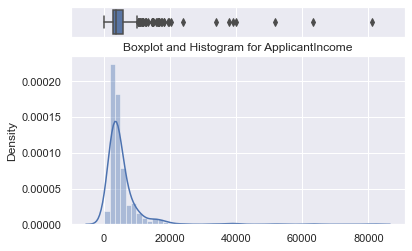

CoapplicantIncome


<Figure size 432x288 with 0 Axes>

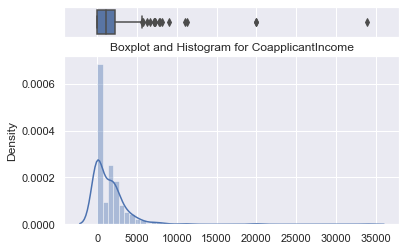

LoanAmount


<Figure size 432x288 with 0 Axes>

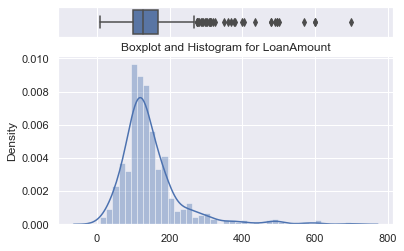

Loan_Amount_Term


<Figure size 432x288 with 0 Axes>

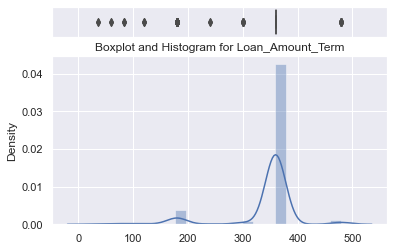

Credit_History


<Figure size 432x288 with 0 Axes>

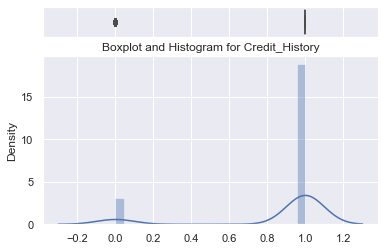

In [23]:
for i in numCol:
    print(i)
    plt.figure()
    sns.set_theme(style="darkgrid")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
    sns.boxplot(x = df[i],ax=ax_box)
    #sns.histplot (data=df, x=i, ax=ax_hist)
    sns.distplot(x= df[i],ax=ax_hist)
    ax_box.set(xlabel='')
    plt.plot()
    plt.title(f"Boxplot and Histogram for {i}")
    plt.show()

In [24]:
pd.DataFrame(df.skew(axis=0,skipna=True))

,0
ApplicantIncome,6.399195
CoapplicantIncome,5.960842
LoanAmount,2.584748
Loan_Amount_Term,-2.338244
Credit_History,-2.043956


# For Skewness

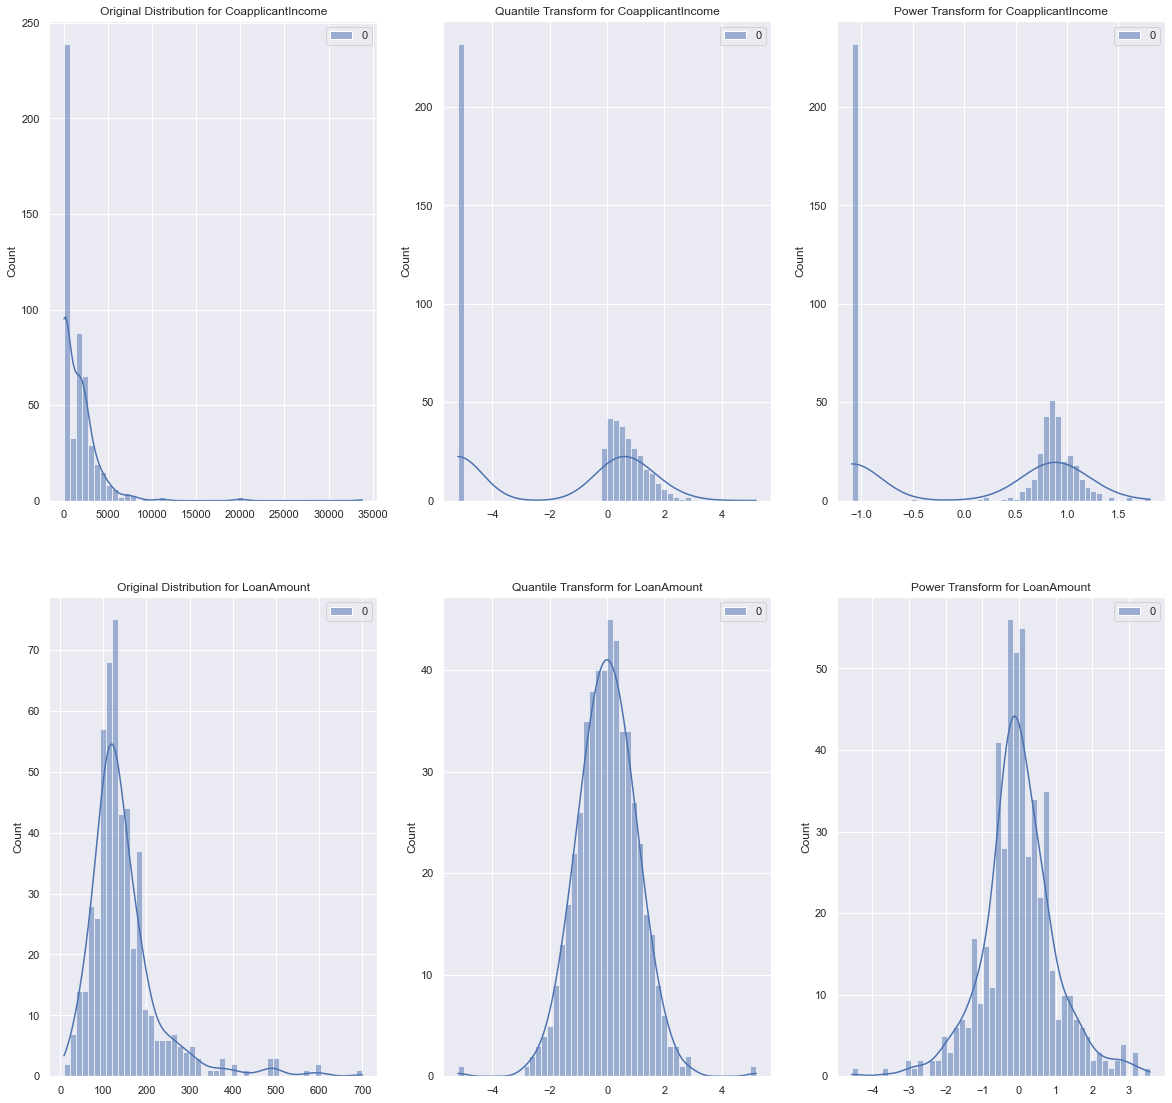

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
cols1 = [ "CoapplicantIncome", "LoanAmount"]
def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,30))
    j = 1
    for i in columns:
        array = np.array(df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(3,3,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(3,3,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(3,3,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")
        j += 3
test_transformers(cols1)

# Multivariate Analysis

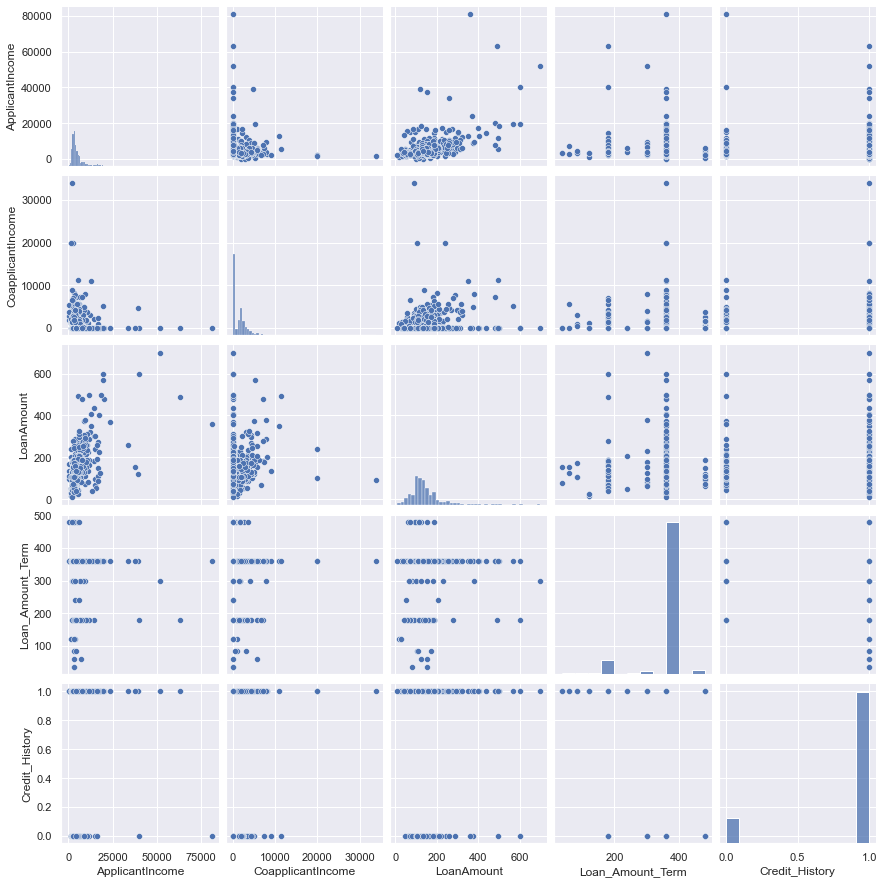

In [26]:
sns.pairplot(df)
plt.plot()
plt.show()

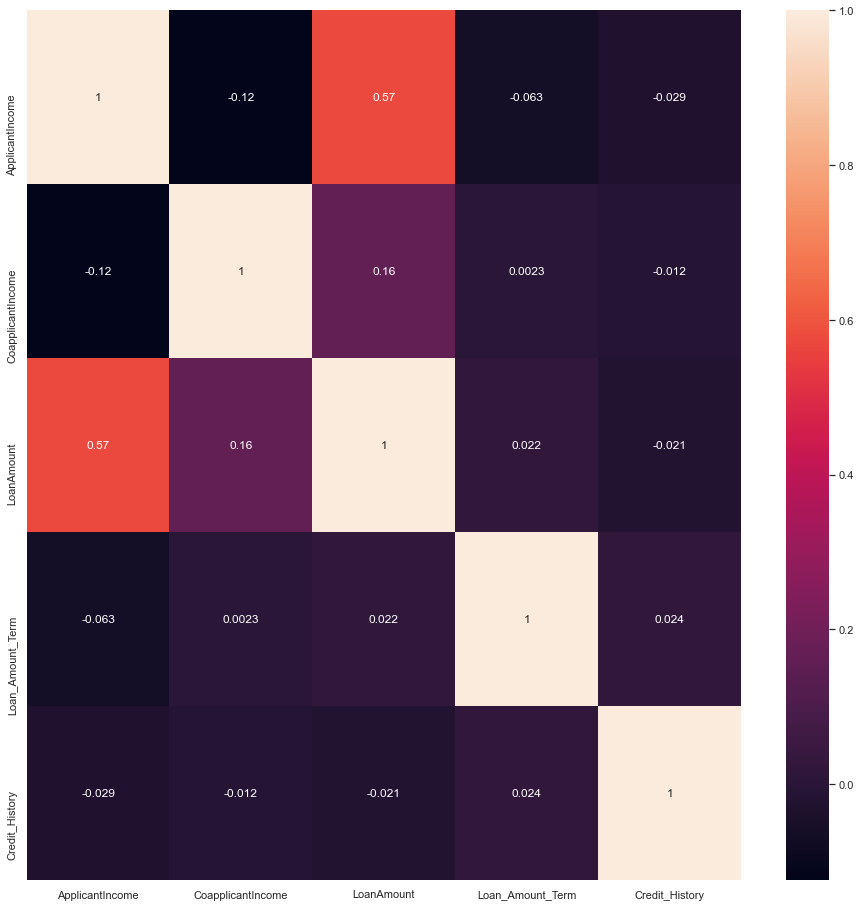

In [27]:
plt.figure(figsize= (16,16))
sns.heatmap(df.corr(),annot=True)
plt.show()

Dark shades represents positive correlation while lighter shades represents negative correlation.If you set annot=True, you’ll get values by which features are correlated to each other in grid-cells.Here we can infer that “density” has strong positive correlation with “LoanAmount” whereas it has strong negative correlation with “ApplicantIncome”.

# Data Scaling

In [28]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [29]:
df_num=pd.DataFrame(imp_median.fit_transform(df[numCol]), columns=numCol)
df_cat=pd.DataFrame(imp_mode.fit_transform(df[catCol]),columns=catCol)

In [30]:
df=pd.concat([df_num,df_cat],axis=1)

# MinMax Sacaling/ Normalization

In [31]:
from sklearn.preprocessing import MinMaxScaler
MinMaxscaler=MinMaxScaler()
MinMax=MinMaxscaler.fit_transform(df[numCol])
print(MinMax)

[[0.05482993 0.0445666  0.17221418 0.72972973 1.        ]
 [0.03525046 0.         0.08248915 0.72972973 1.        ]
 [0.03009276 0.06968703 0.16063676 0.72972973 1.        ]
 ...
 [0.09798392 0.00709283 0.35311143 0.72972973 1.        ]
 [0.09193568 0.         0.25759768 0.72972973 1.        ]
 [0.05482993 0.         0.17945007 0.72972973 0.        ]]


In [32]:
df[numCol]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583.0,1508.0,128.0,360.0,1.0
1,3000.0,0.0,66.0,360.0,1.0
2,2583.0,2358.0,120.0,360.0,1.0
3,6000.0,0.0,141.0,360.0,1.0
4,5417.0,4196.0,267.0,360.0,1.0
...,...,...,...,...,...
512,2900.0,0.0,71.0,360.0,1.0
513,4106.0,0.0,40.0,180.0,1.0
514,8072.0,240.0,253.0,360.0,1.0
515,7583.0,0.0,187.0,360.0,1.0


In [33]:
minMaxDF=pd.DataFrame(MinMax,columns=numCol)
minMaxDF

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.054830,0.044567,0.172214,0.729730,1.0
1,0.035250,0.000000,0.082489,0.729730,1.0
2,0.030093,0.069687,0.160637,0.729730,1.0
3,0.072356,0.000000,0.191027,0.729730,1.0
4,0.065145,0.124006,0.373372,0.729730,1.0
...,...,...,...,...,...
512,0.034014,0.000000,0.089725,0.729730,1.0
513,0.048930,0.000000,0.044863,0.324324,1.0
514,0.097984,0.007093,0.353111,0.729730,1.0
515,0.091936,0.000000,0.257598,0.729730,1.0


In [34]:
minMaxDF.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,517.0,0.066687,0.080056,0.0,0.033952,0.045553,0.070142,1.0
CoapplicantIncome,517.0,0.045975,0.075248,0.0,0.000000,0.033277,0.066495,1.0
LoanAmount,517.0,0.198473,0.122895,0.0,0.131693,0.172214,0.230101,1.0
Loan_Amount_Term,517.0,0.688797,0.145521,0.0,0.729730,0.729730,0.729730,1.0
Credit_History,517.0,0.856867,0.350548,0.0,1.000000,1.000000,1.000000,1.0


In [35]:
df[numCol].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,517.0,5541.632495,6472.488133,150.0,2895.0,3833.0,5821.0,81000.0
CoapplicantIncome,517.0,1555.657485,2546.176498,0.0,0.0,1126.0,2250.0,33837.0
LoanAmount,517.0,146.145068,84.920461,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,517.0,341.825919,64.611485,36.0,360.0,360.0,360.0,480.0
Credit_History,517.0,0.856867,0.350548,0.0,1.0,1.0,1.0,1.0


# Outlier Analysis

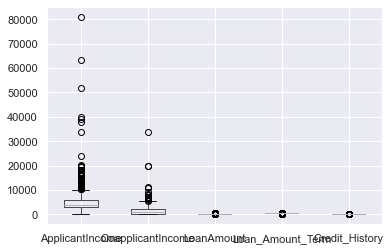

In [36]:
df.boxplot();

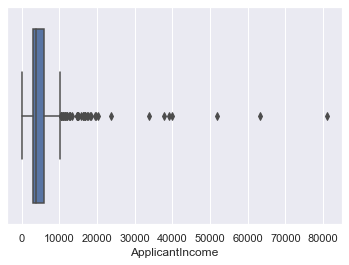

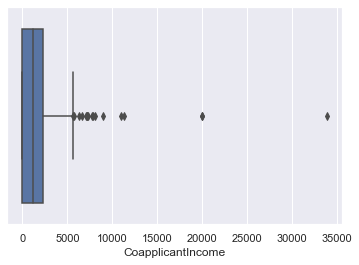

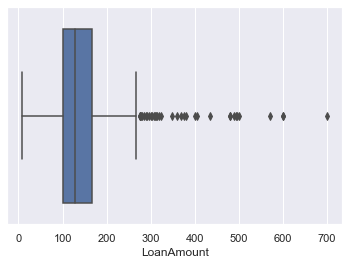

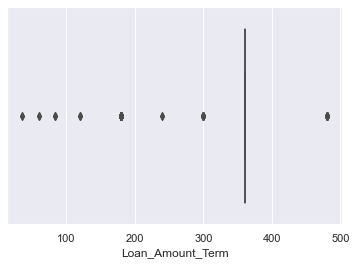

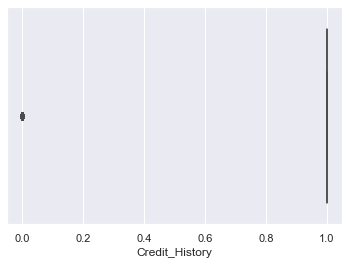

In [37]:
for i in numCol:
    plt.figure()
    sns.boxplot(x=df[i])

In [38]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(((df<(Q1-1.5 * IQR)) | (df > (Q3 +1.5 * IQR ))).sum())

ApplicantIncome      45
CoapplicantIncome    17
Credit_History       74
Dependents            0
Education             0
LoanAmount           35
Loan_Amount_Term     74
Married               0
dtype: int64


In [39]:
outNum =[]
for i in numCol:
    q1= df[i].quantile(0.25)
    q3= df[i].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    outNum.append([i,q1,q3,iqr,lower_limit,upper_limit])
    
    df[i] = np.where(df[i]> upper_limit,upper_limit,
                 np.where(df[i]< lower_limit,lower_limit,
                         df[i]))
    

In [40]:
pd.DataFrame(outNum,columns=["variableName","Q1","Q3","IQR","lowe_limit","upper_limit"])

,variableName,Q1,Q3,IQR,lowe_limit,upper_limit
0,ApplicantIncome,2895.0,5821.0,2926.0,-1494.0,10210.0
1,CoapplicantIncome,0.0,2250.0,2250.0,-3375.0,5625.0
2,LoanAmount,100.0,168.0,68.0,-2.0,270.0
3,Loan_Amount_Term,360.0,360.0,0.0,360.0,360.0
4,Credit_History,1.0,1.0,0.0,1.0,1.0


# Heatmap of Dataset

<AxesSubplot:>

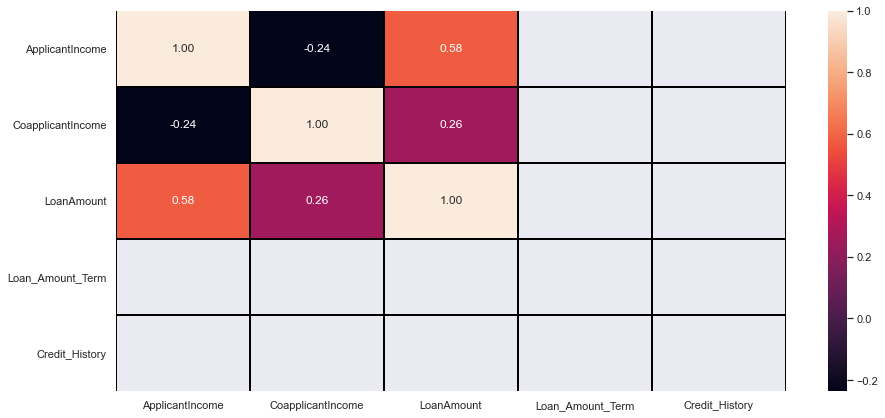

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

In [42]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,517.000000,517.000000,517.000000,517.0,517.0
mean,4680.193424,1388.951489,138.255319,360.0,1.0
std,2537.498616,1600.205817,58.532081,0.0,0.0
min,150.000000,0.000000,9.000000,360.0,1.0
25%,2895.000000,0.000000,100.000000,360.0,1.0
50%,3833.000000,1126.000000,128.000000,360.0,1.0
75%,5821.000000,2250.000000,168.000000,360.0,1.0
max,10210.000000,5625.000000,270.000000,360.0,1.0


In [43]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of      ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583.0             1508.0       128.0             360.0   
1             3000.0                0.0        66.0             360.0   
2             2583.0             2358.0       120.0             360.0   
3             6000.0                0.0       141.0             360.0   
4             5417.0             4196.0       267.0             360.0   
..               ...                ...         ...               ...   
512           2900.0                0.0        71.0             360.0   
513           4106.0                0.0        40.0             360.0   
514           8072.0              240.0       253.0             360.0   
515           7583.0                0.0       187.0             360.0   
516           4583.0                0.0       133.0             360.0   

     Credit_History Married Dependents     Education  
0    

# Dropping columns

In [45]:
df=df.drop('Married',axis=1)
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents,Education
0,4583.0,1508.0,128.0,360.0,1.0,1,Graduate
1,3000.0,0.0,66.0,360.0,1.0,0,Graduate
2,2583.0,2358.0,120.0,360.0,1.0,0,Not Graduate
3,6000.0,0.0,141.0,360.0,1.0,0,Graduate
4,5417.0,4196.0,267.0,360.0,1.0,2,Graduate
...,...,...,...,...,...,...,...
512,2900.0,0.0,71.0,360.0,1.0,0,Graduate
513,4106.0,0.0,40.0,360.0,1.0,3+,Graduate
514,8072.0,240.0,253.0,360.0,1.0,1,Graduate
515,7583.0,0.0,187.0,360.0,1.0,2,Graduate


In [59]:
df=df.drop('Dependents',axis=1)
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education
0,4583.0,1508.0,128.0,360.0,1.0,Graduate
1,3000.0,0.0,66.0,360.0,1.0,Graduate
2,2583.0,2358.0,120.0,360.0,1.0,Not Graduate
3,6000.0,0.0,141.0,360.0,1.0,Graduate
4,5417.0,4196.0,267.0,360.0,1.0,Graduate
...,...,...,...,...,...,...
512,2900.0,0.0,71.0,360.0,1.0,Graduate
513,4106.0,0.0,40.0,360.0,1.0,Graduate
514,8072.0,240.0,253.0,360.0,1.0,Graduate
515,7583.0,0.0,187.0,360.0,1.0,Graduate


In [69]:
df=df.drop('Education',axis=1)
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583.0,1508.0,128.0,360.0,1.0
1,3000.0,0.0,66.0,360.0,1.0
2,2583.0,2358.0,120.0,360.0,1.0
3,6000.0,0.0,141.0,360.0,1.0
4,5417.0,4196.0,267.0,360.0,1.0
...,...,...,...,...,...
512,2900.0,0.0,71.0,360.0,1.0
513,4106.0,0.0,40.0,360.0,1.0
514,8072.0,240.0,253.0,360.0,1.0
515,7583.0,0.0,187.0,360.0,1.0


In [70]:
df.shape

(517, 5)

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [71]:
X=df.drop('CoapplicantIncome',axis=1)
Y=df['CoapplicantIncome']

In [72]:
Y.value_counts()

0.0       232
5625.0     20
1666.0      5
2083.0      5
2500.0      5
         ... 
1875.0      1
3500.0      1
5064.0      1
4600.0      1
1700.0      1
Name: CoapplicantIncome, Length: 227, dtype: int64

In [73]:
X

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583.0,128.0,360.0,1.0
1,3000.0,66.0,360.0,1.0
2,2583.0,120.0,360.0,1.0
3,6000.0,141.0,360.0,1.0
4,5417.0,267.0,360.0,1.0
...,...,...,...,...
512,2900.0,71.0,360.0,1.0
513,4106.0,40.0,360.0,1.0
514,8072.0,253.0,360.0,1.0
515,7583.0,187.0,360.0,1.0


In [74]:
Y

0      1508.0
1         0.0
2      2358.0
3         0.0
4      4196.0
        ...  
512       0.0
513       0.0
514     240.0
515       0.0
516       0.0
Name: CoapplicantIncome, Length: 517, dtype: float64

# Label Binarization

In [75]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0)

In [76]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
512    0
513    0
514    1
515    0
516    0
Name: CoapplicantIncome, Length: 517, dtype: int64

In [77]:
X

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583.0,128.0,360.0,1.0
1,3000.0,66.0,360.0,1.0
2,2583.0,120.0,360.0,1.0
3,6000.0,141.0,360.0,1.0
4,5417.0,267.0,360.0,1.0
...,...,...,...,...
512,2900.0,71.0,360.0,1.0
513,4106.0,40.0,360.0,1.0
514,8072.0,253.0,360.0,1.0
515,7583.0,187.0,360.0,1.0


In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,-0.038340,-0.175378,0.0,0.0
1,-0.662787,-1.235652,0.0,0.0
2,-0.827281,-0.312188,0.0,0.0
3,0.520625,0.046937,0.0,0.0
4,0.290649,2.201688,0.0,0.0
...,...,...,...,...
512,-0.702234,-1.150146,0.0,0.0
513,-0.226502,-1.680283,0.0,0.0
514,1.337968,1.962271,0.0,0.0
515,1.145072,0.833592,0.0,0.0


# Creating the training and testing datasets

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

# Machine Learning Model for Classification and Evaluation Metrics

In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [81]:
#Classification of model function
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=21)
#Training the model
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    acc_score=(accuracy_score(Y_test,pred))*100
    print("Accuracy Score:",acc_score)
    class_report=classification_report(Y_test,pred)
    print("\nClassification Report:\n",class_report)
    cv_score=(cross_val_score(model,X,Y,cv=5).mean())*100
    print("Cross Validation Score:",cv_score)
    result=acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is",result)

In [82]:
#Logistic Regression model
model=LogisticRegression()
classify(model,X,Y)

Accuracy Score: 75.96153846153845

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69        41
           1       0.80      0.81      0.80        63

    accuracy                           0.76       104
   macro avg       0.75      0.75      0.75       104
weighted avg       0.76      0.76      0.76       104

Cross Validation Score: 78.15533980582525

Accuracy Score - Cross Validation Score is -2.193801344286797


In [83]:
#Linear support vector classifier model
model=SVC(C=1.0,kernel='rbf',gamma='auto',random_state=42)
classify(model,X,Y)

Accuracy Score: 76.92307692307693

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.76      0.72        41
           1       0.83      0.78      0.80        63

    accuracy                           0.77       104
   macro avg       0.76      0.77      0.76       104
weighted avg       0.77      0.77      0.77       104

Cross Validation Score: 79.88610903659448

Accuracy Score - Cross Validation Score is -2.963032113517542


In [84]:
#Decision Tree Classifier model
model=DecisionTreeClassifier(random_state=21,max_depth=15)
classify(model,X,Y)

Accuracy Score: 71.15384615384616

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.76      0.67        41
           1       0.81      0.68      0.74        63

    accuracy                           0.71       104
   macro avg       0.71      0.72      0.71       104
weighted avg       0.73      0.71      0.71       104

Cross Validation Score: 73.48767737117252

Accuracy Score - Cross Validation Score is -2.333831217326363


In [85]:
#Random Forest Classifier Model
model=RandomForestClassifier(max_depth=15,random_state=111)
classify(model,X,Y)

Accuracy Score: 75.0

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.80      0.72        41
           1       0.85      0.71      0.78        63

    accuracy                           0.75       104
   macro avg       0.75      0.76      0.75       104
weighted avg       0.77      0.75      0.75       104

Cross Validation Score: 78.90776699029128

Accuracy Score - Cross Validation Score is -3.907766990291279


In [86]:
#KNeighbors Classifier Model
model=KNeighborsClassifier(n_neighbors=15)
classify(model,X,Y)

Accuracy Score: 73.07692307692307

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.76      0.69        41
           1       0.82      0.71      0.76        63

    accuracy                           0.73       104
   macro avg       0.73      0.74      0.73       104
weighted avg       0.75      0.73      0.73       104

Cross Validation Score: 78.72106049290515

Accuracy Score - Cross Validation Score is -5.644137415982087


In [87]:
#Extra Tree Classifier Model
model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 75.0

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.78      0.71        41
           1       0.84      0.73      0.78        63

    accuracy                           0.75       104
   macro avg       0.74      0.76      0.75       104
weighted avg       0.76      0.75      0.75       104

Cross Validation Score: 76.7905153099328

Accuracy Score - Cross Validation Score is -1.7905153099328004


# AUC ROC Curve

In [88]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 75.96153846153845


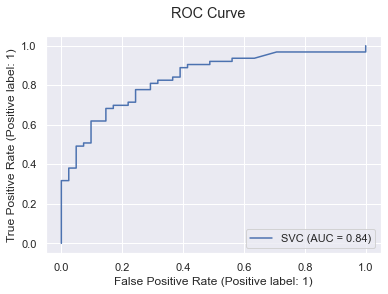

In [89]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

In [ ]:
The Area under the Curve be found as 84%.